# Welcome to the Goodreads 100k dataset 
# 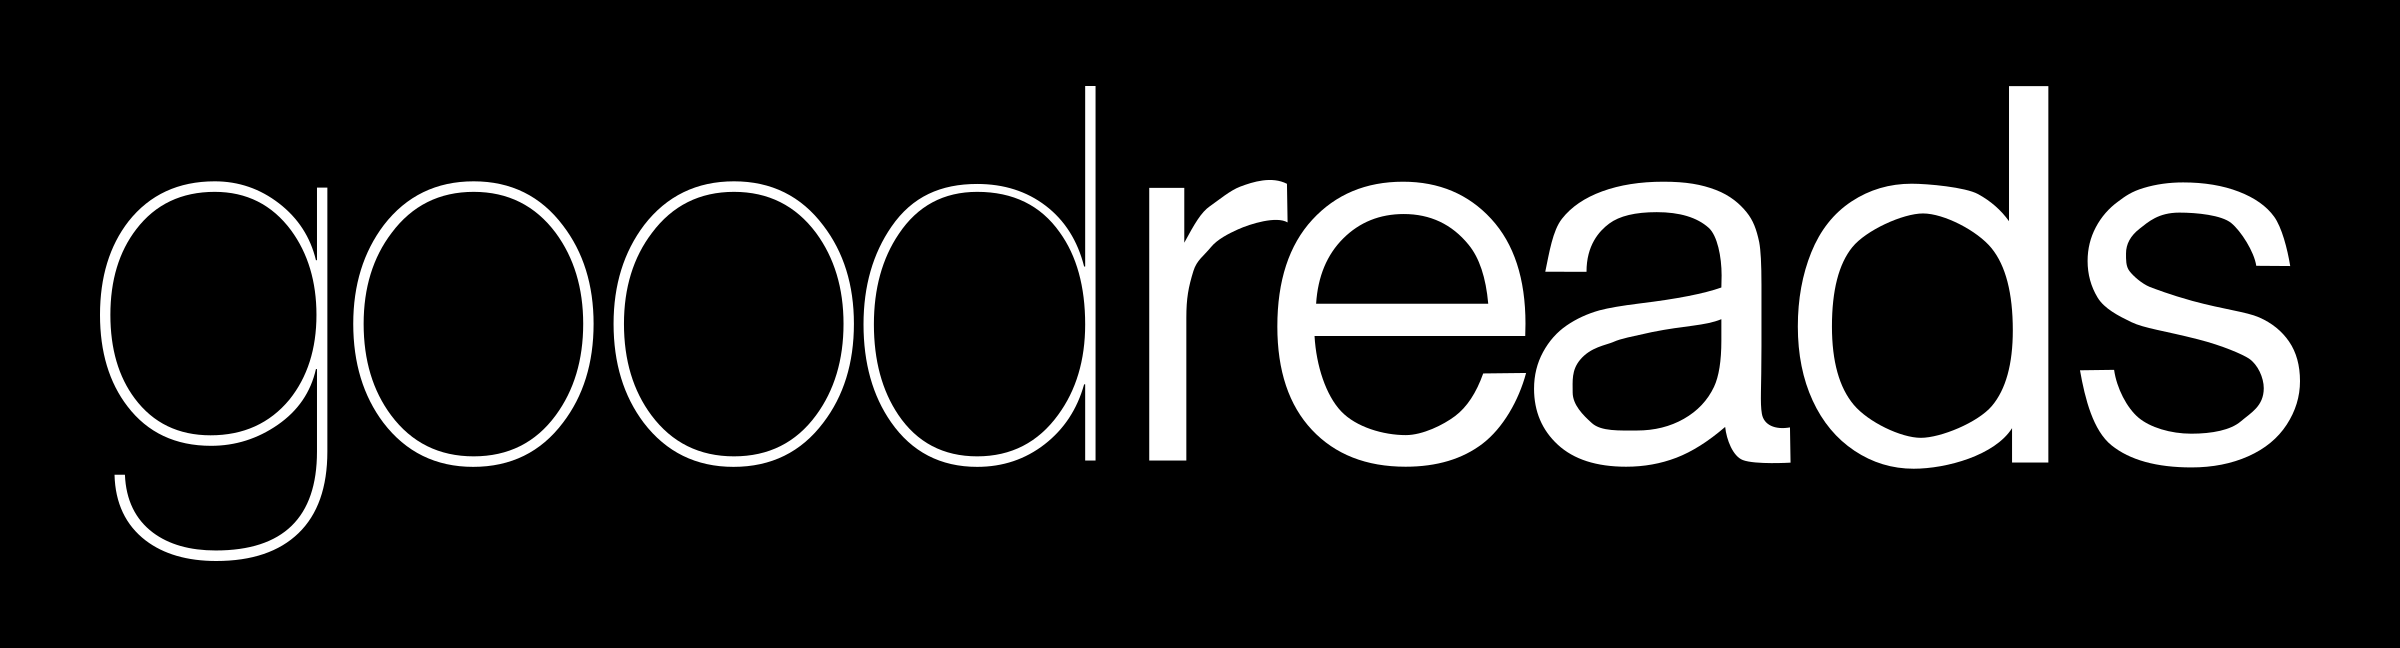

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image as im
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

from colorama import Fore, Back, Style
red = Fore.RED
grn = Fore.GREEN
blu = Fore.BLUE
ylw = Fore.YELLOW
wht = Fore.WHITE
mag = Fore.MAGENTA

palette = sns.color_palette("bright",15)
sns.palplot(palette)
sns.set_palette("Paired")

In [ ]:
data = pd.read_csv('../input/goodreads-books-100k/GoodReads_100k_books.csv')
data.head()

In [ ]:
data.isnull().sum()

In [ ]:
def clean(feature):
    cleaned_feature = list()
    for feat in data[feature]:
        if len(feat.split(',')) > 1:
            temp = feat.split(',')
            for a in temp:
                cleaned_feature.append(a)
        else:
            cleaned_feature.append(feat)
    return cleaned_feature

In [ ]:
def plot_barplot(x,y,df):
    sns.set(style = 'darkgrid',font_scale=0.25,rc={"grid.linewidth": 0.2});
    plt.figure(dpi=250);
    sns.barplot(y=y,x=x,
                palette=palette, 
                edgecolor=".9",
                data=df );
    plt.legend(title=f'{x} by {y}', fontsize='10', title_fontsize='14');

In [ ]:
def plot_distribution(data,feat,color,alpha=1):
    sns.set(font_scale=1);
    sns.displot(data[feat],color=color,kde=True,aspect=15/10,alpha = alpha,);
    print(f'{red}Max value of {feat} is {data[feat].max()}\n{blu}Min value of {feat} is {data[feat].min()}\n{grn}Std value of {feat} is {data[feat].std()}\n{ylw}Mean value of {feat} is {data[feat].mean()}\n{mag}Median value of {feat} is {data[feat].median()}')

In [ ]:
book_mask = np.load('../input/book-mask-for-wordcloud/book_mask2.npy')
mask = im.fromarray(book_mask)
plt.title("Book Mask");
plt.axis('off');
maskplot = plt.imshow(mask);

In [ ]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, color = 'white',title = None, title_size=30):

    cloud = WordCloud(background_color=color,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 7,
                    width=400, 
                    height=200,
                    mask = mask,
                         )
    texts = ''.join(text)                                                                                                                                                                                                                                                             
    cloud.generate_from_text(str(texts))
    
    plt.figure(figsize=(10,16))
    plt.imshow(cloud);
    plt.title(title, fontdict={'size': title_size, 'color': 'black', 'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout() 

## **Authors**

In [ ]:
all_authors = clean('author')
authors = pd.DataFrame(all_authors, columns = ['authors'])
author_counts = authors.value_counts()
authors['books_count'] = authors['authors'].apply(lambda x: author_counts[x])
sorted_authors = authors.sort_values(by='books_count',ascending=False)
sorted_authors = sorted_authors.drop_duplicates(['authors'])
sorted_authors = sorted_authors.reset_index(drop = True)

In [ ]:
plot_barplot('books_count','authors',sorted_authors[:100])

In [ ]:
plot_wordcloud(sorted_authors.authors[:100],mask=book_mask,title="WordCloud of Authors")

In [ ]:
plot_distribution(sorted_authors[:1000],'books_count','green',0.6);

## **Book Format**

In [ ]:
book_format = pd.DataFrame(data['bookformat'].values, columns = ['format'])
book_format['format'] = book_format['format'].fillna('None')
format_counts = book_format['format'].value_counts()
book_format['format_count'] = book_format['format'].apply(lambda x: format_counts[x])
sorted_format = book_format.sort_values(by='format_count',ascending=False)
sorted_format = sorted_format.drop_duplicates(['format'])
sorted_format = sorted_format.reset_index(drop = True)

In [ ]:
plot_barplot('format_count','format',sorted_format[:25])

In [ ]:
plot_distribution(sorted_format[:25],'format_count','orange');

## **Genre**

In [ ]:
data['genre'] = data['genre'].fillna('None')
all_genres = clean('genre')
genres = pd.DataFrame(all_genres, columns = ['genres'])
genre_counts = genres.value_counts()
genres['genre_count'] = genres['genres'].apply(lambda x: genre_counts[x])
sorted_genres = genres.sort_values(by='genre_count',ascending=False)
sorted_genres = sorted_genres.drop_duplicates(['genres'])
sorted_genres = sorted_genres.reset_index(drop = True)

In [ ]:
plot_barplot('genre_count','genres',sorted_genres[:110])

In [ ]:
plot_wordcloud(sorted_genres.genres[:1000],mask=book_mask,title="WordCloud of Genres")

In [ ]:
plot_distribution(sorted_genres[:120],'genre_count','lime',0.4);

## **Pages**

In [ ]:
division_factor = 1000
steps = int(data['pages'].max() // division_factor)
bins = np.linspace(data['pages'].min(),data['pages'].max(), steps, dtype = int)

In [ ]:
pages = pd.DataFrame(pd.cut(data['pages'],bins = bins).values, columns = ['pages_bins'])
pages_counts = pages['pages_bins'].value_counts()
pages['page_count'] = pages['pages_bins'].apply(lambda x: pages_counts[x])
sorted_pages = pages.sort_values(by='page_count',ascending=False)
sorted_pages = sorted_pages.drop_duplicates(['pages_bins'])
sorted_pages = sorted_pages[sorted_pages['page_count'] !=0]
sorted_pages = sorted_pages.reset_index(drop = True)

In [ ]:
plot_distribution(sorted_pages[:4],'page_count','red',0.4)

In [ ]:
plot_barplot('page_count','pages_bins',sorted_pages)

### Most of the books are in 0-1000 range .. let's divide them further

In [ ]:
division_factor = 100
steps = int(3000 // division_factor)
bins = np.linspace(data['pages'].min(),3000, steps, dtype = int)

In [ ]:
new_pages = pd.DataFrame(pd.cut(data['pages'][data['pages'] < 3000],bins = bins).values, columns = ['new_pages_bins'])
new_pages_counts = new_pages['new_pages_bins'].value_counts() 
new_pages['page_count'] = new_pages['new_pages_bins'].apply(lambda x: new_pages_counts[x])
sorted_new_pages = new_pages.sort_values(by='page_count',ascending=False)
sorted_new_pages = sorted_new_pages[sorted_new_pages['page_count'] >= 1]
sorted_new_pages = sorted_new_pages.drop_duplicates(['new_pages_bins'])
sorted_new_pages = sorted_new_pages.reset_index(drop = True)

In [ ]:
plot_barplot('page_count','new_pages_bins',sorted_new_pages)

## **Avg Ratings**

In [ ]:
plot_distribution(data,'rating','rebeccapurple',0.8);

## **Reviews**

In [ ]:
division_factor = 1500
steps = int(data['reviews'].max() // division_factor)
bins = np.linspace(data['reviews'].min(),data['reviews'].max(), steps, dtype = int)

In [ ]:
reviews = pd.DataFrame(pd.cut(data['reviews'],bins = bins).values, columns = ['reviews_bins'])
reviews_counts = reviews['reviews_bins'].value_counts()
reviews['review_count'] = reviews['reviews_bins'].apply(lambda x: reviews_counts[x])
sorted_reviews = reviews.sort_values(by='review_count',ascending=False)
sorted_reviews = sorted_reviews.drop_duplicates(['reviews_bins'])
sorted_reviews = sorted_reviews[sorted_reviews['review_count'] !=0]
sorted_reviews = sorted_reviews.reset_index(drop = True)

In [ ]:
plot_barplot('review_count','reviews_bins',sorted_reviews)

### Most of the reviews are in 0-1500 range .. let's divide in the similar way we did with pages

In [ ]:
division_factor = 100
steps = int(3000 // division_factor)
bins = np.linspace(data['reviews'].min(),3000, steps, dtype = int)

In [ ]:
new_reviews = pd.DataFrame(pd.cut(data['reviews'][data['reviews'] < 3000],bins = bins).values, columns = ['new_reviews_bins'])
new_reviews_counts = new_reviews['new_reviews_bins'].value_counts() 
new_reviews['review_count'] = new_reviews['new_reviews_bins'].apply(lambda x: new_reviews_counts[x]).astype(float)
sorted_new_reviews = new_reviews.sort_values(by='review_count',ascending=False)
sorted_new_reviews = sorted_new_reviews.drop_duplicates(['new_reviews_bins'])
sorted_new_reviews = sorted_new_reviews.reset_index(drop = True)

In [ ]:
plot_barplot('review_count','new_reviews_bins',sorted_new_reviews)

## **Total Ratings**

In [ ]:
division_factor = 100
steps = int(5000 // division_factor)
bins = np.linspace(data['totalratings'].min(),5000, steps, dtype = int)

In [ ]:
new_tratings = pd.DataFrame(pd.cut(data['totalratings'][data['totalratings'] < 5000],bins = bins).values, columns = ['new_tratings_bins'])
new_tratings_counts = new_tratings['new_tratings_bins'].value_counts() 
new_tratings['trating_count'] = new_tratings['new_tratings_bins'].apply(lambda x: new_tratings_counts[x]).astype(float)
sorted_new_tratings = new_tratings.sort_values(by='trating_count',ascending=False)
sorted_new_tratings = sorted_new_tratings.drop_duplicates(['new_tratings_bins'])
sorted_new_tratings = sorted_new_tratings.reset_index(drop = True)

In [ ]:
plot_barplot('trating_count','new_tratings_bins',sorted_new_tratings)